# Introducción a Machine Learning


El **Aprendizaje de Máquina** se concentra en la construcción y estudio de sistemas que puedan aprender de los datos. El problema principal consiste en encontrar patrones, relaciones y regularidades sobre los datos, los cuales le permitan construir modelos descriptivos y predictivos. Una aplicación muy común del Aprendizaje de Máquina consiste en la detección de spam, en el cual un modelo recibe un nuevo correo y lo etiqueta como spam o no.

Para construir un modelo de este tipo, se deben tener en cuenta dos conceptos claves. El primero es que el modelo debe  realizar un **proceso automático de clasificación**, sin que el usuario le especifique de forma explicita la forma en la que la clasificación se lleve a cabo. Por ejemplo, el modelo recibe ejemplos de correos que son spam y ejemplos de correos que no lo son. El segundo concepto consiste en que el modelo debe tener capacidad de **generalización**, es decir, el modelo debe ser capaz de predecir sobre datos nunca antes vistos. En el ejemplo del filtrado de spam, estamos interesados en clasificar de forma automática los correos que vayan llegando a la bandeja de entrada del usuario.

A continuación, abordaremos un problema de clasificación binaria sobre un subconjunto del conjunto de datos IRIS.

# Un problema de clasificación de dos clases

El siguiente código va a cargar un conjunto de datos (IRIS) que nos va a servir para ilustrar en que consiste un problema de clasificación y como resolverlo con un modelo de machine learning. Por ahora no nos vamos a preocupar de donde vienen los datos y como se procesan (esto se discutirá en la próxima sesión). 

A continuación, cargaremos todas las librerias necesarias para trabajar en el notebook:

In [0]:
%matplotlib inline
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn import datasets
from io import BytesIO
from PIL import Image

En la siguiente línea se carga el conjunto de datos de flores IRIS

In [0]:
iris = datasets.load_iris()

En la siguiente función se puede graficar los datos escogiendo dos características de la base de datos de Iris

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


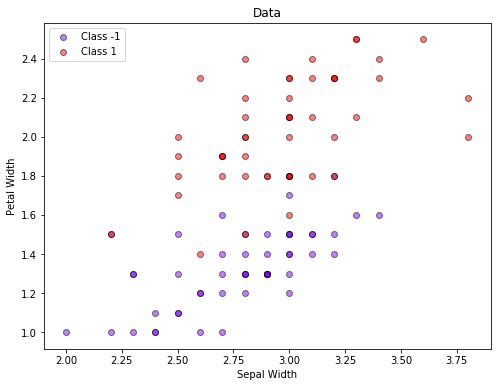

In [4]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

y = 2*iris.target[iris.target != 0] - 3
X_noscale = iris.data[:,[1, 3]]
X_noscale = X_noscale[iris.target != 0, :]
X = preprocessing.scale(X_noscale)


pl.figure(figsize=(8, 6))
pl.xlabel('Sepal Width')
pl.ylabel('Petal Width')
plot_data(X_noscale, y)

Los datos deben ser presentados como arreglos bi-dimensionales de números. Cada fila corresponde a una instancia de entrenamiento, sobre la cual queremos aprender o hacer una predicción sobre sus datos.

Verifiquemos el tamaño de cada arreglo construído

In [5]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [6]:
np.unique(y, return_counts=True)

(array([-1,  1]), array([50, 50]))

Observamos que cada clase tiene 50 ejemplos en total. Los datos de una clase se representan con una etiqueta positiva, 1, y los de la otra clase con una etiqueta negativa, -1.

In [7]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Pregunta
**¿Cómo diferenciamos entre ambas clases de manera automática?**

Es decir si me dan un nuevo ejemplo, quiero poderlo clasificar en uno de estas dos clases.

# Clasificación usando un modelo lineal

## Discriminación lineal

* Nuestro modelo de clasificación es una función que recibe un ejemplo $x$ y retorna la predicción. Esta función se basa en una función (llamada discriminante) $f:\mathbb{R}^{2}\rightarrow\mathbb{R}$ tal que:
$$\textrm{Predicción}(x)=\begin{cases}
C_{1} & \mbox{si }f(x)\ge \theta\\
C_{2} & \mbox{si }f(x)<\theta
\end{cases}$$

* Para el caso de discriminación lineal, definimos $f$ como un modelo lineal con parámetros $w$ y $w_0$:
$$f(x) =  wx+w_0$$

### Problemas

* **¿Cómo encontrar $f$?**

* **¿Cómo estimamos $w$ y $w_0$?**

## Funciones de pérdida

La pérdida (loss en inglés) es la penalidad por una predicción errada. En otras palabras, la pérdida indica qué tan errada fue la predicción de un modelo en un ejemplo. Si la predicción de mi modelo es perfecta, la pérdida es **cero**, de lo contrario, la pérdida va a ser un número mayor a cero.

Una función de pérdida muy común es la pérdida cuadrática:
$$ L(f, D) =\sum_{(x_{i},r_{i})\in D} (r_i - f(x_i))^2 $$

donde:
* $(x_{i},r_{i})$ es un ejemplo en el cual $x_i$ corresponde a un conjunto de características, en nuestro conjunto de datos, corresponde a las 2 características extraídas de una flor (ancho del sépalo y ancho del pétalo). Estas características son usadas por el modelo para hacer predicciones. $r_i$ corresponde a la etiqueta del ejemplo, por ejemplo la especie de la flor.
* $f(x_i)$ corresponde a la función de predicción que definimos previamente. Esta función es de la forma $f(x) = wx+w_0$.
* $D$ corresponde al conjunto de datos compuesto por varios ejemplos anotados. 

## Aprendizaje como optimización

* Estimar los parámetros $w$ y $w_0$ puede ser abordado como un problema de optimización que consiste en:
$$\min_{f\in H}L(f,D)$$
dónde $L(f, D)$ es la función de pérdida cuadrática. Esto se resume en encontrar una función $f$ que genere el valor mínimo de pérdida promedio con respecto a todos los ejemplos del conjunto de datos.
* La función $f$ proviene de un conjunto de funciones llamado el espacio de hipótesis:
$$H=\{f_w(x,y)=wx+w_0,\forall w\in\mathbb{R}^n \ y \ w_0\in\mathbb{R}\}$$
dónde $w$ y $w_0$ son los coeficientes de la función $f(x) = wx+w_0$.
* La función de pérdida nos ayuda a estimar qué tan mal se comporta una función $f$ del espacio de hipótesis con respecto al conjunto de datos $D$.

A continuación, definimos en Python las funciones de predicción y pérdida, para nuestro problema.

In [0]:
def predict(w, x):
    a = np.dot(w[1:], x) + w[0]
    return a

In [0]:
def square_loss(w, x, y):
    return (y - predict(w, x)) ** 2 / 2

def batch_loss(loss_fun, w, X, Y):
    n = X.shape[0]
    tot_loss = 0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss

Supongamos $w$ y $w_0$:
* $w = [5, 2]$
* $w_0 = 1$

Escogemos el primer ejemplo de nuestro conjunto de datos Iris:

In [10]:
w = [1, 5, 2] # Por facilidad, w[0] es igual a w_0
x = X[0] # Primer ejemplo de nuestro conjunto de datos IRIS.
label = y[0]

print('Características: {}'.format(X[0]))
print('Etiqueta real: {}'.format(y[0]))
print('Función discriminante: {}'.format(predict(w, x)))


Características: [ 0.99068792 -0.65303909]
Etiqueta real: -1
Función discriminante: 4.647361438018154


Puesto que el valor de la función discriminante es $f(x)>0$, la clase predicha es positiva.
Ahora, estimamos el valor de pérdida usando esos valores de $w$ y $w_0$

In [11]:
print('Pérdida: {}'.format(square_loss(w, x, label)))

Pérdida: 15.946345605807238


¿Qué pasa si modificamos uno de los parámetros $w$?

In [12]:
w_p = [1, 5, 3]

print('Etiqueta: {}'.format(y[0]))
print('Predicción: {}'.format(predict(w_p, x)))
print('Pérdida w_p: {}'.format(square_loss(w_p, x, label)))

Etiqueta: -1
Predicción: 3.9943223502437437
Pérdida w_p: 12.471627869072096


Observamos que nuestra pérdida bajó de $15.94$ a $12.47$. Sin embargo, estamos interesados en automatizar este proceso. Primero vamos a observar cómo se comporta la función de pérdida cuadrática.

## Analizando la función de pérdida cuadrática

A continuación, definimos un par de funciones de python para poder visualizar la función de pérdida

In [0]:
def plot_loss(loss):
    w1_vals = np.linspace(-5, 5, 30)
    w2_vals = np.linspace(-5, 5, 30)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    grid_r, grid_c = W1.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = loss(W1[i, j], W2[i, j])
    pl.contourf(W1, W2, ZZ,30, cmap = pl.cm.jet)
    pl.colorbar()
    pl.xlabel("w1")
    pl.ylabel("w2")

def bloss_square(w1, w2):
    w = np.array([1, w1, w2])
    return batch_loss(square_loss, w, X, y)

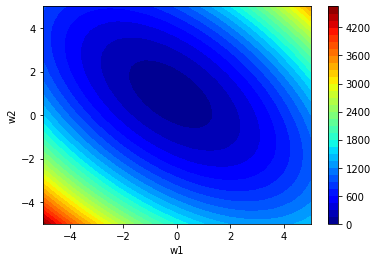

In [14]:
plot_loss(bloss_square)

Intepretación: Observamos que el valor mínimo de nuestra función de pérdida se encuentra alrededor de:
* $w_1 = 0.0$
* $w_2 = 1.0$

## ¿Cómo resolver el problema de aprendizaje?

* Existen varios enfoques:
    * Optimización lineal
    * Optimización convexa
    * Optimización no-lineal
    * Optimización combinatoria
* No existe una estrategia de optimización que funcione para todos los problemas. [No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem)
* **En este caso vamos a usar gradiente descendente** 

## Gradiente descendente

* Ventajas:
  * Óptimo global garantizado
  * Simplicidad del método
  * Facilidad para ajustar los parámetros
  * Escalabilidad
  * Paralelización potencial.
* En aprendizaje de máquina, las preferencias cambian sobre el tiempo.
* Hoy en día es escalable. Inclusive, la estrategias paralelizables son preferidas a sabiendas de la optimalidad garantizada.

Minimizar la función $L(f, D)$, donde $f$ es nuestra función de predicción resulta ser un problema convexo, es decir, existe solo un lugar donde la inclinación de la curva de pérdida es igual a cero. Ese valor mínimo es dónde nuestra función de pérdida $L$ **converge**.

Por otro lado, calcular el valor de la función de pérdida para cada posible valor de $w$ sobre el conjunto de datos es una forma muy ineficiente de hallar ese valor de convergencia. Gradiente descendente es un mecanismo iterativo que nos permite hallar ese valor de convergencia.

<img src="https://i.stack.imgur.com/JcfpK.png">

### Algoritmo gradiente descendente:

* Paso 1: Escogemos un valor inicial o punto de partida. Puede ser cero o un valor aleatorio. Este valor inicial no tiene relevancia para este problema. 
* Paso 2: Calculamos el **gradiente de la función de pérdida** para el punto de partida. El gradiente de la pérdida me indica la derivada (inclinación) de la curva. El gradiente a su vez es un vector, por lo tanto tiene **dirección** y **magnitud**, esta dirección siempre apunta hacía donde se genera el mayor incremento en la función de pérdida. 
* Paso 3: Calculamos un nuevo valor $w$ cambiándolo en la dirección negativa del gradiente, con el objetivo reducir la pérdida lo más pronto posible.
* Paso 4: El nuevo valor de $w$ también estará determinado por la magnitud del gradiente y una **tasa de aprendizaje** $\eta$. Por ejemplo, si la magnitud del gradiente es 2.5 y la tasa de aprendizaje es 0.01, gradiente descendente escogerá un punto $w$ que esté alejado 0.025 unidades del punto anterior $w$. Para el cálculo de $w$ usaremos la siguiente fórmula:
$$
w = w - \eta \frac{\partial L}{\partial w}
$$
* Repetir desde el Paso 1.

#### Problemas

* ¿Qué pasa si el tamaño de nuestro paso es muy grande y no alcanza el minimo local?


<img src="http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/images/gradient_descent/figure3.png" height="310" width="280">


La elección de una tasa de aprendizaje alta puede terminar en que nunca alcanzemos el punto de convergencia. Pero una tasa muy pequeña puede llevar a que tome mucho tiempo llegar al mínimo global





### ¿Cómo se calcula el gradiente?

$$
\begin{aligned}L(f,D) & = \sum_{(x_{i},r_{i})\in D} (r_i - f(x_i))^2 \\
 & =\sum_{(x_{i},r_{i})\in D}E(w, x_i, r_i)
\end{aligned}
$$
Si $f_w$ es la función que definimos antes:
$$
\frac{\partial E(w,x_{i,}r_{i})}{\partial w}=(f_{w}(x_{i})-r_{i})x_{i}
$$

A continuación, definimos una función `de_dw` que corresponde el derivadas parciales de $E$ con respecto a los coeficientes $w$.

In [0]:
def de_dw(w, x, r):
    x_prime = np.zeros(len(x) + 1)
    x_prime[1:] = x
    x_prime[0] = 1
    return (predict(w, x) - r) * x_prime

## Gradiente descendente en batch

Para estimar el gradiente, lo hacemos a lo largo de todos nuestro conjunto de datos. Puesto que solo contamos con 100 ejemplos, es relativamente rápido hacer este cálculo. Sin embargo, en la pŕactica puede ser ineficiente si se cuenta con un gran número de ejemplos de entrenamiento.

A continuación, se define la función para el gradiente descendente en batch:

In [0]:
def batch_gd(X, Y, epochs, eta, w_ini):
    """
    X: instancias del conjunto de datos
    Y: etiquetas del conjunto de datos
    epochs: número de iteraciones para ejecutar
    gradiente descendente
    eta: taza de aprendizaje
    w_ini: w y w_0 iniciales
    
    """
    losses = []
    w = w_ini 
    n = X.shape[0]
    for i in range(epochs): 
        delta = np.zeros(len(w))
        for j in range(n):
            delta += de_dw(w, X[j], Y[j]) # Vamos sumando el gradiente por cada ejemplo en el conjunto de datos
        w = w - eta * delta # Calculamos el nuevo valor de w
        losses.append(batch_loss(square_loss, w, X, Y)) # Vamos guardando el valor de pérdida para visualizar luego
    return w, losses

Vamos a ejecutar gradiente descendente en batch con los siguientes parámetros:
* $epochs = 50$
* $w_0 = 0$ ($w_0$ inicial)
* $w = [0, 0]$ ($w$ inicial)
* $\eta = 0.01$ (tasa de aprendizaje)

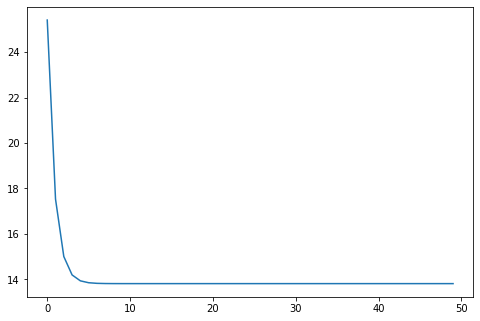

In [18]:
w, losses = batch_gd(X, y, 50, 0.01, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

# Gradiente descendente estocástico (SGD)


Cuando trabajamos con grandes conjuntos de datos, se vuelve poco práctico el cálculo del gradiente sobre todo el conjunto de datos. Una forma de disminuir el tiempo de computación es escogiendo muestras al azar de nuestro conjunto de datos, que nos generan un estimado en promedio del gradiente promedio. SGD toma entonces una muestra de forma aleatoria a la vez y estima el valor del gradiente para esa muestra. A pesar de ser ruidoso, SGD funciona bastante bien en la práctica.

A continuación, se define la función para el gradiente descendente estocástico:

In [0]:
 def sgd(X, Y, epochs, eta, w_ini):
    """
    X: instancias del conjunto de datos
    Y: etiquetas del conjunto de datos
    epochs: número de iteraciones para ejecutar
            gradiente descendente
    eta: tasa de aprendizaje
    w_ini: w y w_0 iniciales
    
    """
    losses = []
    w = w_ini
    n = X.shape[0]
    for i in range(epochs):
        for j in range(n):
            delta = de_dw(w, X[j], Y[j]) # Aquí estimamos el gradiente para cada elemento pero no para todo el dataset
            w = w - eta * delta
        losses.append(batch_loss(square_loss, w, X, Y))
    return w, losses

A continuación, comparamos el comportamiento de Gradiente Descendente en Batch y Estocástico. Observamos que tienen un comportamiento similar para nuestro problema de clasificación de dos clases.

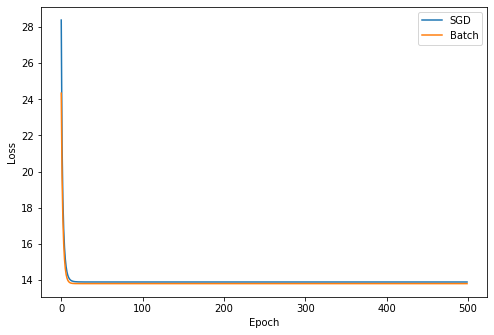

In [20]:
lr = 0.005
epochs = 500
w1, losses_bt = batch_gd(X, y, epochs, lr, np.array([0, 0, 0])) #Batch
w2, losses_ol = sgd(X, y, epochs, lr, np.array([0, 0, 0])) #SGD
pl.figure(figsize = (8,16/3))
pl.plot(np.arange(epochs), losses_ol, label="SGD")
pl.plot(np.arange(epochs), losses_bt, label="Batch")
pl.xlabel("Epoch")
pl.ylabel("Loss")
pl.legend()

## Visualización de la función de predicción

Es útil poder visualizar qué regiones de nuestro espacio en 2D son asignadas a la clase positiva y a la clase negativa. Para eso escribimos una función que nos permite visualizar la región de decisión de nuestros clasificadores, como sigue:

In [0]:
def plot_decision_region(X, pred_fun):
    """
    X: corresponde a las instancias de nuestro conjunto de datos
    pred_fun: es una función que para cada valor de X, me regresa una predicción
    """
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

In [0]:
def gen_pred_fun(w):
    def pred_fun(x1, x2):
        x = np.array([x1, x2])
        return predict(w, x)
    return pred_fun

Visualizemos el caso donde nuestros coeficientes sean de la forma:
* $w_0 = 0$
* $w = [0.6, 1]$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


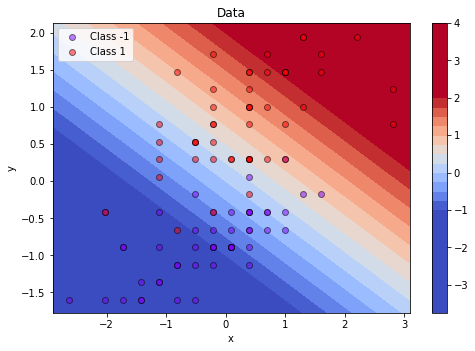

In [23]:
w = [0, 0.6, 1]

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(w))
plot_data(X, y)

Nada útil, sin embargo si visualizamos el resultado luego de aplicar SGD:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


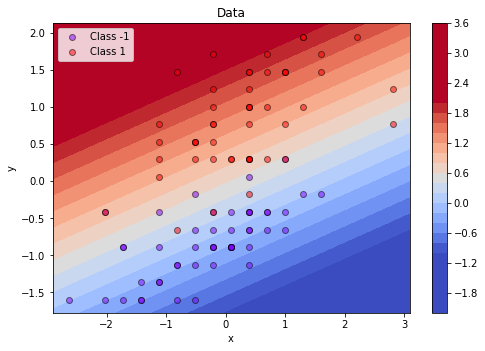

In [24]:
lr = 0.5
epochs = 500
w, _ = sgd(X, y, epochs, lr, np.array([0, -1, 2])) #SGD

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(w))
plot_data(X, y)

In [25]:
w

array([ 0.61344313, -0.32989191,  0.91922391])